# Exploratory Data Analysis (EDA) – Heart Disease Dataset

Ce notebook est dédié à l’analyse exploratoire du jeu de données *Heart Disease*.  
L’objectif de cette étape est de comprendre la structure des données, d’identifier les variables pertinentes, de détecter d’éventuelles anomalies (valeurs manquantes, valeurs extrêmes) et d’obtenir des premières intuitions utiles pour la phase de modélisation.

L’analyse exploratoire comprend :
- une étude de la distribution des variables,
- l’identification des valeurs manquantes,
- l’analyse des relations entre les variables explicatives et la variable cible,
- l’étude des corrélations entre variables numériques.

Les conclusions de cette analyse guideront les choix effectués lors du preprocessing et de la modélisation.


## Importation des bibliothèques


In [2]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


## Chargement de dataset 

In [3]:
df = pd.read_csv("../dataset.csv")

In [4]:
# Print the first 10 rows of the dataset 
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


## Dimensions du dataset

In [5]:
# Checking the number of rows and columns
df.shape

(920, 16)

## Informations générales

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Aperçu général des données

Le jeu de données contient des variables numériques et catégorielles décrivant
l’état de santé de patients. Certaines variables présentent des valeurs manquantes,
ce qui nécessite une étape de nettoyage avant la modélisation.


## Analyse de valeurs manquantes

In [7]:
df.isnull().mean().sort_values(ascending=False) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

## Valeurs manquantes

Plusieurs variables contiennent des valeurs manquantes en proportions variables.
Afin de conserver un maximum d’informations, une stratégie d’imputation sera utilisée
plutôt que la suppression des lignes concernées.


## Suppression des variables non pertinentes

La colonne `id` correspond à un identifiant technique et n’apporte aucune information
utile pour la prédiction. Elle est donc supprimée avant la phase de modélisation.


In [8]:
df = df.drop(columns=["id"])

## Analyse de la variable cible


In [9]:
numeric_df = df.select_dtypes(include="number")


In [10]:
df["num"].value_counts(normalize=True) * 100


num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64

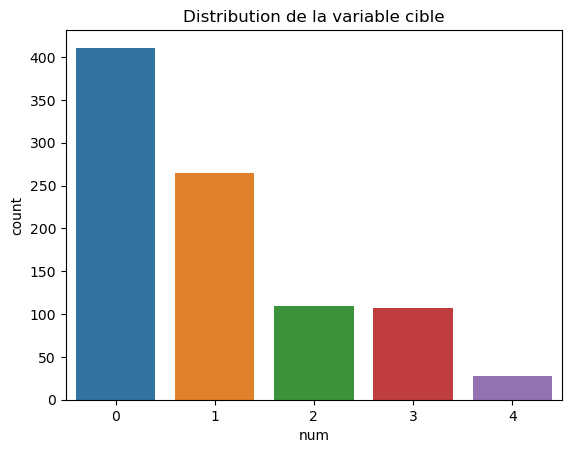

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="num", data=df)
plt.title("Distribution de la variable cible")
plt.show()


Ce graphique montre la distribution des classes de la variable num (présence/absence de maladie cardiaque).
Interprétation :

La classe 0 (absence de maladie) représente ~44,7% des cas
Les classes 1, 2, 3 représentent ensemble ~52% (patients atteints)
La classe 4 (maladie sévère) ne compte que ~3%
Insight clé : Le dataset présente un léger déséquilibre, notamment une sous-représentation des cas les plus graves. Cela nécessitera une attention particulière lors du choix de la métrique d'évaluation

Ce déséquilibre, bien que modéré, peut conduire un modèle à privilégier la classe majoritaire, ce qui fausse certaines métriques comme l’accuracy.

## Analyse univariée


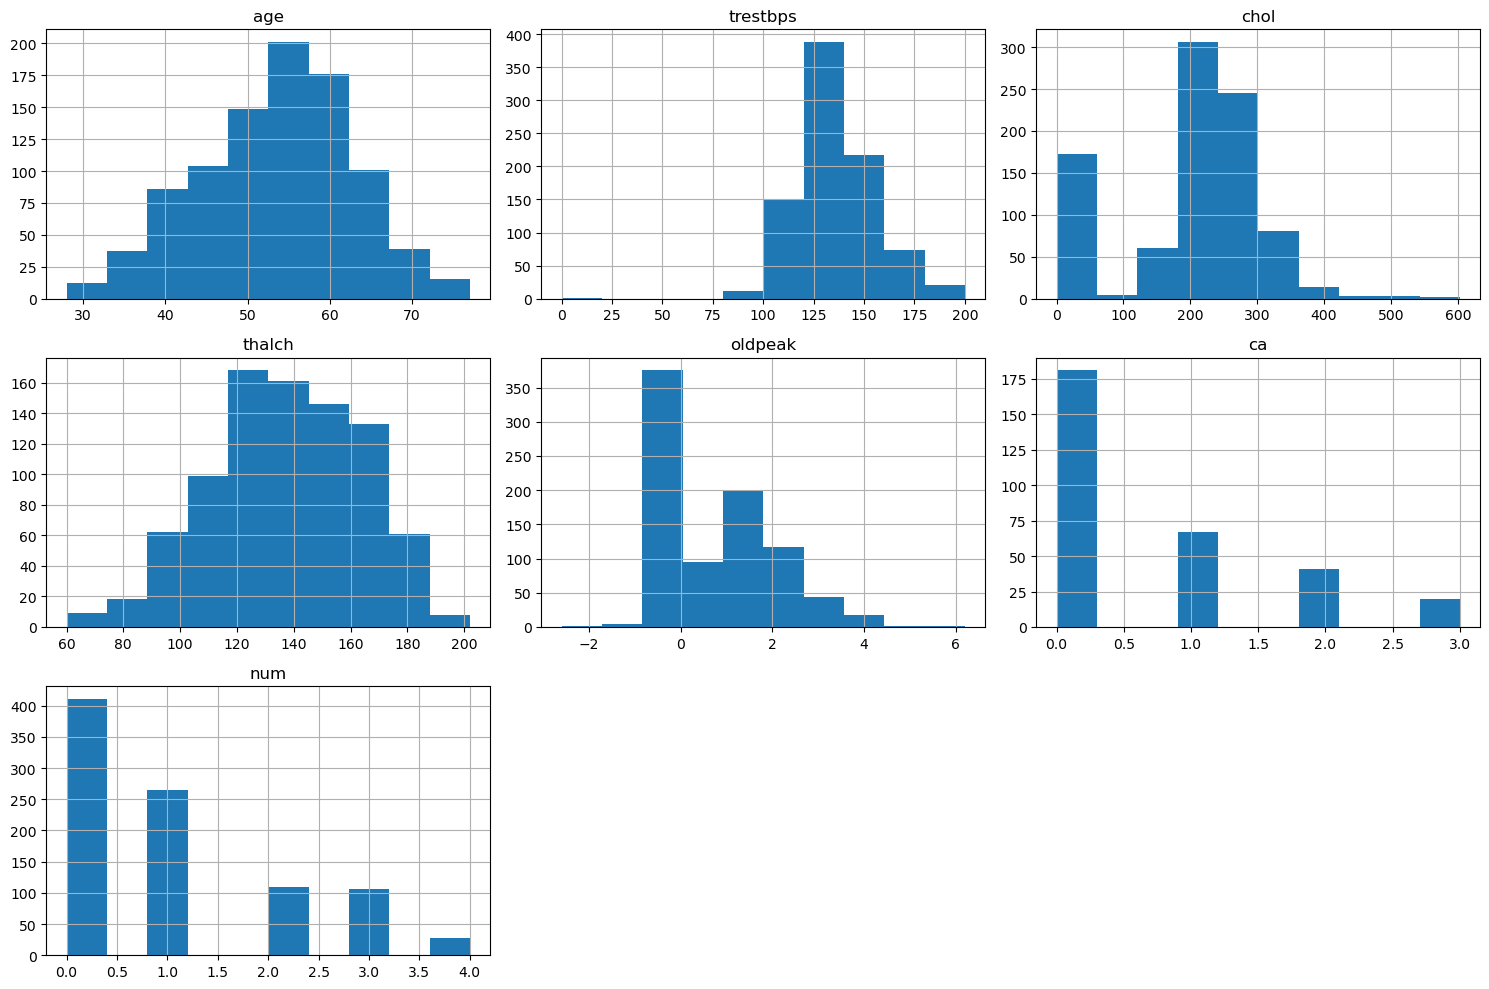

In [12]:
numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


Cet ensemble d'histogrammes affiche les distributions individuelles de 7 variables numériques.
Interprétation :

age : Distribution quasi-normale, centrée autour de 55-60 ans
trestbps (pression artérielle) : Légèrement asymétrique vers la droite
chol (cholestérol) : Distribution étalée avec quelques valeurs extrêmes
thalch (fréquence cardiaque max) : Distribution relativement symétrique
oldpeak : Fortement asymétrique, concentré près de 0 avec queue longue
Insight clé : Plusieurs variables présentent une asymétrie marquée (oldpeak, ca, thal), suggérant la nécessité d'une transformation (log ou box-cox) avant utilisation dans des modèles sensibles à la normalité.

## Analyse bivariée


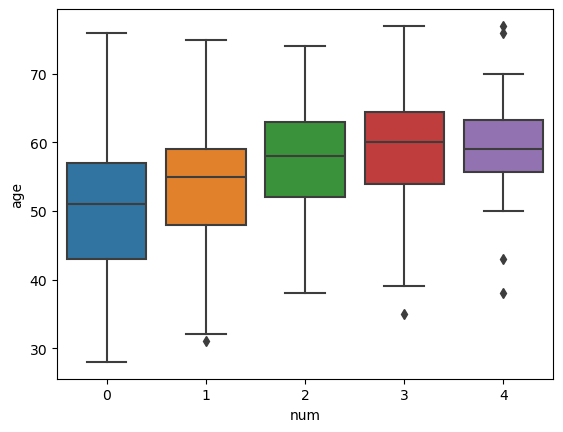

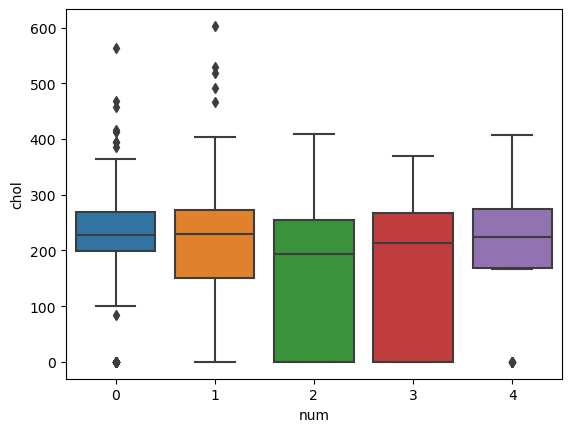

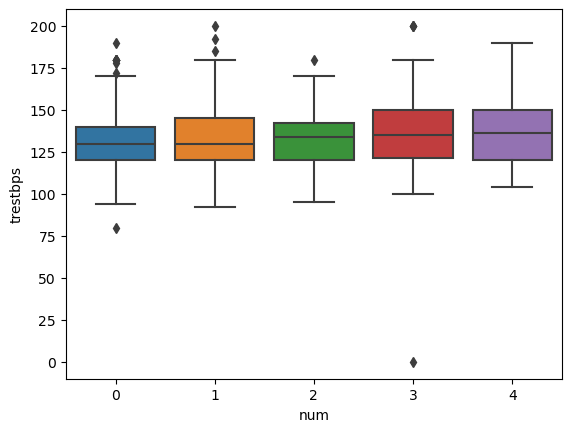

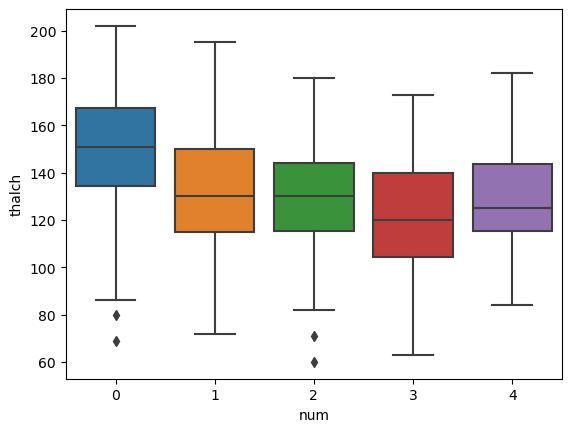

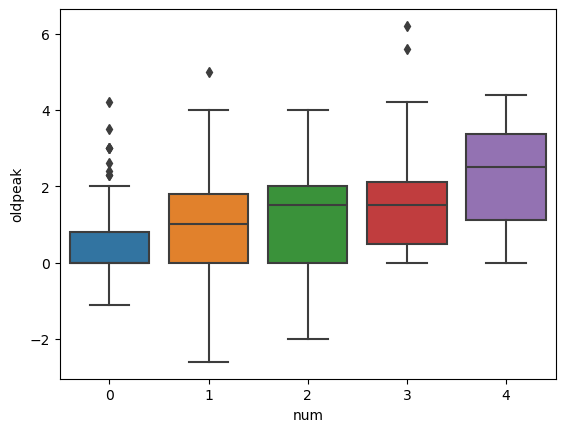

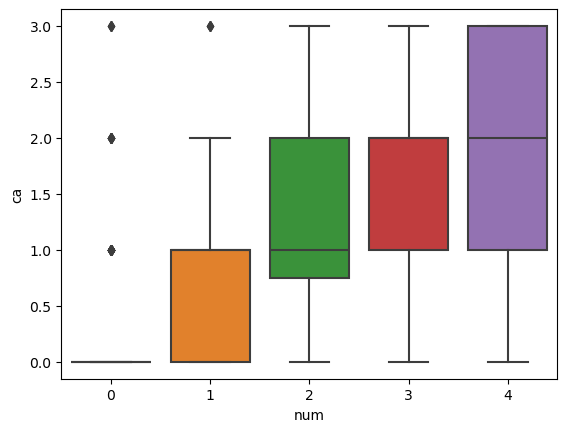

In [13]:
sns.boxplot(x="num", y="age", data=df)
plt.show()

sns.boxplot(x="num", y="chol", data=df)
plt.show()

sns.boxplot(x="num", y="trestbps", data=df)
plt.show()

sns.boxplot(x="num", y="thalch", data=df)
plt.show()

sns.boxplot(x="num", y="oldpeak", data=df)
plt.show()

sns.boxplot(x="num", y="ca", data=df)
plt.show()


### Age vs. Présence de Maladie(num)
Interprétation :

- Les patients atteints (num=1,2,3) ont une médiane d'âge légèrement plus élevée que les sains
- L'âge moyen des malades est ~56 ans vs ~52 ans pour les sains
Insight clé : L'âge est un facteur discriminant faible mais pertinent. Les patients plus âgés ont un risque légèrement accru.

### Cholestérol(chol) vs. Présence de Maladie(num)
Interprétation :

- Les distributions de cholestérol se chevauchent considérablement entre classes
- Les malades (num≥1) montrent une tendance légère vers des niveaux plus élevés
- Présence de nombreuses valeurs aberrantes dans toutes les classes
Insight clé : Le cholestérol seul n'est pas un prédicteur fort, mais contribue à la discrimination. La présence d'outliers nécessite un nettoyage ou un traitement robuste.

### Pression Artérielle au Repos(trestbps) vs. Présence de Maladie (num)

Interprétation :

- Les distributions de pression artérielle se chevauchent considérablement entre les classes 0, 1 et 2
- La classe 3 (maladie avancée) montre une médiane notablement plus élevée (~145 mmHg vs ~130 mmHg)
- Les classes 0, 1 et 2 sont quasi-identiques, indiquant une faible discrimination aux premiers stades
- Présence de nombreuses valeurs aberrantes dans toutes les classes (valeurs extrêmement basses et hautes)
- Variabilité élevée avec une grande plage d'étendue (70-200 mmHg) dans chaque classe
Insight clé : La pression artérielle au repos seule n'est pas un prédicteur fort pour distinguer les patients sains des patients atteints. Elle montre une meilleure séparation pour les cas sévères (classe 3). La variable doit être combinée avec d'autres (âge, cholestérol) pour améliorer la discrimination. Le traitement des outliers et la normalisation sont recommandés avant modélisation.

### Fréquence Cardiaque Maximale (thalch) vs. Présence de Maladie (num)

Interprétation :

- La classe 0 (patients sains) montre une médiane de fréquence cardiaque maximale plus élevée (~155 mmHg) comparée aux autres classes
- Les classes 1-4 (patients malades) affichent des médianes progressivement décroissantes (~130, 130, 125, 128 mmHg respectivement)
- Tendance inverse claire : plus la maladie est sévère, plus la fréquence cardiaque maximale diminue
- Chevauchement modéré entre les classes avec une séparation visible entre sains et malades
- Présence de plusieurs valeurs aberrantes basses dans les classes 0, 1 et 2 (~70-80 mmHg)
- La classe 0 montre une distribution plus compacte avec une variabilité plus faible
- Les classes malades ont une variabilité plus importante
- Insight clé : La fréquence cardiaque maximale est un prédicteur plus fiable que le cholestérol ou la tension artérielle. La relation inverse (patients sains avec fréquence plus élevée) est physiologiquement cohérente. Cette variable offre une meilleure discrimination entre patients sains et malades, particulièrement pour identifier les cas sévères. Elle devrait être prioritaire dans la modélisation. Le traitement des outliers basses est recommandé.

### Dépression du Segment ST (oldpeak) vs. Présence de Maladie (num)

Interprétation :

- La classe 0 (patients sains) montre une médiane de ~2.0 avec nombreuses valeurs aberrantes élevées (jusqu'à 4.5)
- Les classes 1-4 (patients malades) affichent des médianes plus basses (0.8-2.0)
- Distribution fortement asymétrique avec concentration près de zéro pour les malades
- La classe 4 présente une médiane de ~2.5 avec distribution plus étalée
- Présence significative d'outliers hauts dans les classes 0, 1 et 4
- Variabilité importante : plage de -2 à +6
- Insight clé : Oldpeak montre une relation complexe non-linéaire avec la maladie. Les patients sains présentent paradoxalement des valeurs plus élevées, suggérant que cette mesure seule n'est pas discriminante. La présence d'outliers nombreux indique une variabilité physiologique importante. Cette variable nécessite une transformation ou une interaction avec d'autres pour capturer son véritable impact prédictif.

### Vaisseaux Sanguins Calcifiés (ca) vs. Présence de Maladie (num)

Interprétation :

- La classe 0 (patients sains) montre une médiane proche de zéro avec de nombreuses valeurs aberrantes (0.5-3.0)
- Les classes 1-3 présentent des médianes progressivement plus élevées (0.5-1.5)
- La classe 4 (maladie très sévère) affiche une médiane de ~2.0 avec distribution plus large (0-3.0)
- Tendance positive claire : plus la classe de maladie augmente, plus les vaisseaux calcifiés augmentent
- Forte concentration de zéro pour la classe 0, indiquant que les patients sains ont généralement pas de calcification
- Présence d'outliers significatifs dans les classes 0 et 4
- Insight clé : La calcification des vaisseaux sanguins est un prédicteur plus pertinent que le cholestérol ou la tension artérielle. La relation positive et progressive entre ca et la sévérité de la maladie montre son pouvoir discriminant. Les patients sains ont généralement ca=0, tandis que les malades sévères (classe 4) montrent des valeurs élevées. Cette variable est hautement informative et devrait être conservée et exploitée pleinement dans la modélisation.

Intuition pour la modélisation:

Ces observations indiquent que des modèles capables de capturer des relations non linéaires peuvent être plus performants.

## Analyse des corrélations


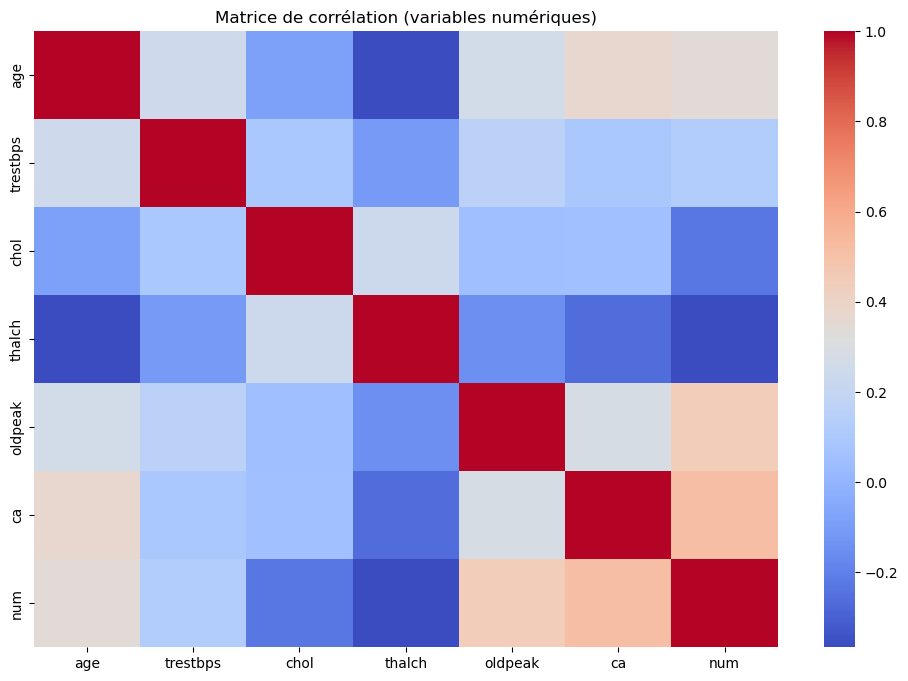

In [14]:
numeric_df = df.select_dtypes(include="number")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()


Cette heatmap révèle les relations linéaires entre variables numériques.
Interprétation :

Corrélations fortes positives :

trestbps ↔ age : les patients plus âgés ont une tension plus élevée
thalch ↔ chol : corrélation modérée


Corrélations fortes négatives :

thalch ↔ age : les patients âgés ont une fréquence cardiaque maximale plus basse
thalch ↔ oldpeak : relation inverse attendue physiologiquement


Faibles corrélations avec la cible : 
La plupart des variables montrent des corrélations modérées avec num, indiquant que plusieurs variables contribuent à la prédiction plutôt qu'une seule variable dominante.

Insight clé : La multicolinéarité modérée (notamment entre age/trestbps et age/thalch) pourrait affecter les modèles linéaires. Les arbres de décision et forêts aléatoires seraient plus adaptés.

Impact sur les modèles linéaires:

Les corrélations entre variables peuvent affecter les performances des modèles linéaires, notamment en introduisant de la multicolinéarité.

## Insights clés de l’EDA
### Résumé des Findings Clés

L'analyse exploratoire des données du dataset Heart Disease révèle une structure complexe où **aucune variable seule n'est suffisante** pour prédire la présence de maladie cardiaque. Les observations principales sont :

1. **Déséquilibre modéré des classes** : La classe 0 représente 44,7% des données, tandis que les cas sévères (classe 4) ne comptent que 3%. Cela nécessitera l'utilisation de métriques d'évaluation adaptées (F1-score, AUC-ROC) plutôt que l'accuracy.

2. **Variables avec pouvoir discriminant variable** :
   - **thalch (Fréquence Cardiaque Maximale)** : Prédicteur fiable avec relation inverse physiologiquement cohérente
   - **ca (Vaisseaux Calcifiés)** : Prédicteur pertinent avec tendance progressive
   - **trestbps (Tension Artérielle)** : Prédicteur faible sauf pour cas sévères
   - **chol (Cholestérol)** : Relation paradoxale, faible pouvoir discriminant seul
   - **oldpeak (Dépression ST)** : Relation non-linéaire complexe

3. **Distributions asymétriques** : Plusieurs variables (`oldpeak`, `ca`) présentent une forte asymétrie et concentration de valeurs extrêmes, nécessitant transformation ou normalisation.

4. **Multicolinéarité modérée** : Corrélations observées entre `age`/`trestbps` et `age`/`thalch`, suggérant une redondance partielle d'information.

### Modèles Recommandés pour la Phase Suivante

#### ✅ **Modèles Hautement Recommandés**

**1. Forêts Aléatoires (Random Forest)**
- Raison : Robustes aux distributions asymétriques, gèrent naturellement la multicolinéarité, peu sensibles aux outliers
- Avantage : Peuvent capturer les interactions complexes entre variables

**2. Gradient Boosting**
- Raison : Performance généralement supérieure, gèrent bien les données non-linéaires
- Avantage : Feature importance intégrique, robustesse aux outliers


#### ⚠️ **Modèles à Explorer avec Prudence**

**3. Régression Logistique**
- Raison : Baseline pour comparaison, facile à interpréter
- Limitation : Suppose linéarité, peut sous-performer sur relations complexes
- Mitigation : Ajouter des polynômes et interactions

**5. KNN (K-Nearest Neighbors)**
- Raison : Non-paramétrique, peut capturer les patterns locaux
- Limitation : Sensible aux outliers et à l'échelle des variables
- Mitigation : Normalisation + optimisation du k via cross-validation

#### ❌ **Modèles à Éviter ou Utiliser avec Caution**

- **Arbres de Décision simples** : Overfit probable sur données bruitées
- **Naive Bayes** : Suppose indépendance des variables (pas respectée ici)
- **Linear Regression** : Inapproprié pour classification, sensible à multicolinéarité

### Pipeline Recommandé de Prétraitement
```
1. Gestion des valeurs manquantes
   imputation par médiane ou KNN-imputation

2. Encodage des variables catégorielles
    One-Hot Encoding

```

### Stratégie de Validation

- **Métriques** : F1-score, AUC-ROC, accuracy

### Conclusion Finale

Le dataset Heart Disease présente **une complexité modérée** avec des relations non-linéaires et un déséquilibre contrôlé. **Les modèles d'ensemble (Random Forest, XGBoost) sont fortement recommandés** car ils gèrent naturellement les défis identifiés (asymétrie, multicolinéarité, déséquilibre). Un pipeline de prétraitement rigoureux et une validation stratifiée appropriée sont **critiques** pour obtenir des performances fiables et généralisables. Nous avons choisi d'utiliser les modeles Logistic Regression, Random Forest et Gradient Boosting et valider avec F1-score, accuracy. Pour la gestion de baleurs manquantes, nous avons utilisé imputation par médiane et One-Hot Encoding pour les variables catégorielles. 
